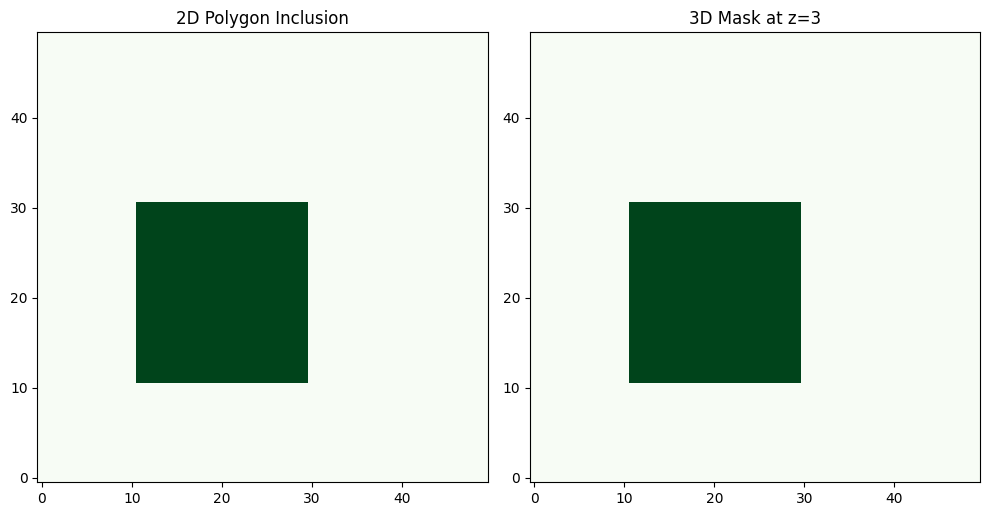

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import segyio
import plotly.graph_objects as go

# ==============================
# 1️⃣ FUNCTION: FIND ALL SEG-Y FILES IN "data" FOLDER
# ==============================
def get_available_datasets(data_folder="/scratch/gilbreth/pate2126/DKP_new/Co2_data/"):
    """
    Finds all SEG-Y files in the specified data folder.
    """
    return [f for f in os.listdir(data_folder) if f.endswith(".sgy")]

# ==============================
# 2️⃣ FUNCTION: READ SEISMIC DATA FROM SEG-Y FILE
# ==============================
def read_segy_file(filename, data_folder="/scratch/gilbreth/pate2126/DKP_new/Co2_data/"):
    """
    Reads a SEG-Y file and extracts seismic trace data.
    """
    file_path = os.path.join(data_folder, filename)

    if not os.path.exists(file_path):
        print(f"❌ Error: File '{file_path}' not found!")
        exit()

    print(f"📂 Opening file: {file_path}")

    with segyio.open(file_path, "r", ignore_geometry=True) as segyfile:
        traces = segyio.tools.collect(segyfile.trace[:])  # Load all traces
        return traces

# ==============================
# 3️⃣ FUNCTION: PLOT SEISMIC SECTION
# ==============================
def plot_seismic_section(traces, title="Seismic Section"):
    """
    Displays a seismic section using a colormap.
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(traces.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces, 99), vmax=np.percentile(traces, 99))
    plt.colorbar(label="Amplitude")
    plt.xlabel("Trace Number")
    plt.ylabel("Time Sample")
    plt.title(title)
    plt.show()

# ==============================
# 4️⃣ FUNCTION: PLOT AMPLITUDE HISTOGRAM
# ==============================
def plot_amplitude_distribution(traces):
    """
    Displays the histogram of seismic trace amplitudes.
    """
    plt.figure(figsize=(10, 5))
    plt.hist(traces.flatten(), bins=100, color="blue", alpha=0.7)
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.title("Amplitude Distribution")
    plt.grid()
    plt.show()

# ==============================
# 5️⃣ FUNCTION: PLOT INDIVIDUAL TRACES
# ==============================
def plot_individual_traces(traces, num_traces=5):
    """
    Plots selected seismic traces.
    """
    plt.figure(figsize=(10, 6))
    for i in range(min(num_traces, len(traces))):
        plt.plot(traces[i] + i * np.max(traces) * 1.2, label=f"Trace {i+1}")
    plt.xlabel("Time Sample")
    plt.ylabel("Amplitude (Offset Applied)")
    plt.title("Individual Seismic Traces")
    plt.legend()
    plt.grid()
    plt.show()

# ==============================
# 6️⃣ FUNCTION: PLOT INTERACTIVE HEATMAP
# ==============================
def plot_interactive_seismic(traces, title="Interactive Seismic Section"):
    """
    Creates an interactive heatmap for better exploration.
    """
    fig = go.Figure(data=go.Heatmap(z=traces.T, colorscale="rdBu"))
    fig.update_layout(title=title, xaxis_title="Trace Number", yaxis_title="Time Sample")
    fig.show()

# ==============================
# 7️⃣ FUNCTION: COMPARE TWO TIME-LAPSE DATASETS
# ==============================
def compare_seismic_datasets(traces1, traces2, title1="Dataset 1", title2="Dataset 2"):
    """
    Compares two seismic datasets by plotting them side by side and showing the difference.
    """
    difference = traces2 - traces1  # Compute time-lapse difference

    fig, ax = plt.subplots(1, 3, figsize=(18, 8))

    # Plot first dataset
    ax[0].imshow(traces1.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces1, 99), vmax=np.percentile(traces1, 99))
    ax[0].set_title(title1)
    ax[0].set_xlabel("Trace Number")
    ax[0].set_ylabel("Time Sample")

    # Plot second dataset
    ax[1].imshow(traces2.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces2, 99), vmax=np.percentile(traces2, 99))
    ax[1].set_title(title2)
    ax[1].set_xlabel("Trace Number")

    # Plot difference
    ax[2].imshow(difference.T, cmap="coolwarm", aspect="auto", vmin=-np.percentile(difference, 99), vmax=np.percentile(difference, 99))
    ax[2].set_title("Seismic Difference (Time-Lapse)")
    ax[2].set_xlabel("Trace Number")

    plt.show()

# ==============================
# 8️⃣ MAIN EXECUTION
# ==============================
if __name__ == "__main__":
    datasets = get_available_datasets()

    if not datasets:
        print("❌ No SEG-Y files found in the data folder.")
        exit()

    print("📌 Available Datasets:")
    for i, f in enumerate(datasets, 1):
        print(f"{i}. {f}")

    print("\nBefore selecting a dataset, you can preview one for inspection.")
    preview_file = input("Enter a dataset filename to preview (or press Enter to skip): ").strip()
    if preview_file and preview_file in datasets:
        preview_traces = read_segy_file(preview_file)
        plot_seismic_section(preview_traces, title=f"Preview: {preview_file}")
        plot_amplitude_distribution(preview_traces)
        plot_individual_traces(preview_traces, num_traces=5)

    selected_file1 = input("\nNow enter the main dataset filename (e.g., '01p01.sgy'): ").strip()
    if selected_file1 not in datasets:
        print(f"❌ Error: '{selected_file1}' not found in the dataset list.")
        exit()

    compare_mode = input("Do you want to compare two datasets? (yes/no): ").strip().lower()
    selected_file2 = None
    if compare_mode == "yes":
        selected_file2 = input("Enter the second dataset filename: ").strip()
        if selected_file2 not in datasets:
            print(f"❌ Error: '{selected_file2}' not found in the dataset list.")
            exit()

    print(f"📂 Loading dataset: {selected_file1}")
    seismic_traces1 = read_segy_file(selected_file1)

    if selected_file2:
        print(f"📂 Loading second dataset: {selected_file2}")
        seismic_traces2 = read_segy_file(selected_file2)
        compare_seismic_datasets(seismic_traces1, seismic_traces2, title1=selected_file1, title2=selected_file2)
    else:
        plot_seismic_section(seismic_traces1, title=f"Seismic Section: {selected_file1}")
        plot_amplitude_distribution(seismic_traces1)
        plot_individual_traces(seismic_traces1, num_traces=5)
        plot_interactive_seismic(seismic_traces1, title=f"Interactive View: {selected_file1}")
